<a href="https://www.kaggle.com/code/astakalaswapnil/pneumonia-detection?scriptVersionId=101821268" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Image Classification (Chest X-ray-Pneumonia Detection) using CNN from Scratch, Transfer Learning and Fine-Tuning Techniques.

* **Model-1: Designing CNN Model from scratch:**In this case everything is trained from scratch. More specifically, the model is designed and trained according to our dataset. This is an efficient approach in the field of medical science.
* **Model-2: Designing CNN with TL Technique:**In this approach a pretrained model is used and modified according to the existing pretrained model to predict the class. 
* **Model-3: Designing CNN with FT Technique:** This is a most efficient approach since, this approach is almost same as our model-2 but, a small transformation leads to a major difference in terms of model’s performance.

So, these are the three different types of approach to the problem which are clearly 
explained in later sections.

# 1. Basic Imports 

In [1]:
import numpy as np             
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Data Processing

The Dataset folder consists of three different folders train, test, and val. Parameters are assigned as train_path for training images, test_path for testing images and valid_path for validation images. 

In [2]:
train_path = '../input/pneumonia-xray-images/train'
test_path = '../input/pneumonia-xray-images/test'
valid_path = '../input/pneumonia-xray-images/val'

batch_size = 32

img_height = 224
img_width = 224

## 2.1. Image Augmentation


**Image Augmentation:**

Data Augmentation is the technique to increase size of a data artificially by performing some image augmentation techniques on the existing train data. Data Augmentation is the essential process to follow to face present AI challenges. This technique improves the training ability of the data by undergoing some image processing techniques so, that the model has a higher chance to predict the case and to increase the model accuracy. Generally, in the field of medical image recognition, it plays a vital role by undergoingsmall transformation in the existing data. The main reason to perform this task is to deal with small datasets, because sharing medical data is probably might cause privacy regulations.

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(
                                  rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True
                               )

test_data_gen = ImageDataGenerator(rescale = 1./255)

In [4]:
train = image_gen.flow_from_directory(
      train_path,
      target_size=(img_height, img_width),
      color_mode='rgb',
      class_mode='binary',
      batch_size=batch_size
      )

test = test_data_gen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      color_mode='rgb',
      shuffle=False, 
      class_mode='binary',
      batch_size=batch_size
      )

valid = test_data_gen.flow_from_directory(
      valid_path,
      target_size=(img_height, img_width),
      color_mode='rgb',
      class_mode='binary', 
      batch_size=batch_size
      )

Found 4192 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.


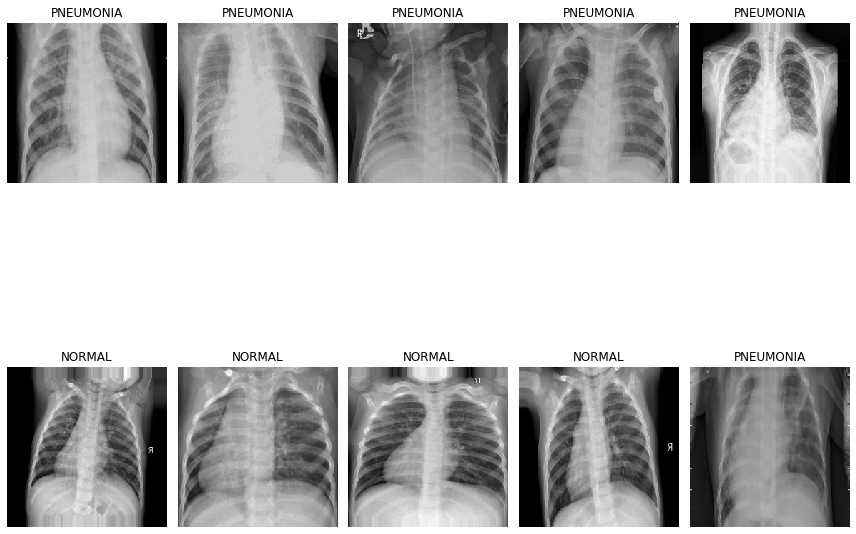

In [5]:
plt.figure(figsize=(12, 12))

for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]        
        dic = {0:'NORMAL', 1:'PNEUMONIA'}
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='gray',interpolation='nearest')
        break
        
plt.tight_layout()
plt.show()

# 3. Model-1: Convolutional Neural Network Model from Scratch (CNN_model)

**Convolutional Neural Network (CNN):**

CNN is a variant of a Multi-Layer Perceptron (MLPs), which refers to the biological terms. CNN are designed to perform tasks on the 2-D image. The network mainly consists of three different layers Convolutional layer, Sub sampling Layer and Output layer. Convolutional layer is the first layer of the network, and which pass the results of respective layer to the next layer. It consists of the convolution layer, function expression and feature maps together generate the result of output layer. Sub sampling layer are always followed by convolutional layer. it reduces the size of feature map and preserves information between features 
    
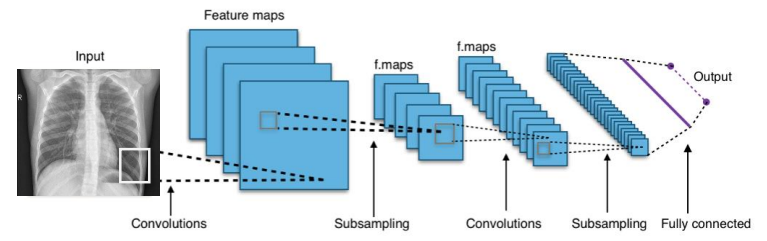    

First model implemented in this project is about designing a CNN network from scratch. Training from scratch refers to a process that had design our own CNN architecture by use of convolution, max pooling, and dense layers, network is trained based on the input weights (images). 

**Convolution Layer:**

CNN architecture is a sequence of layers of convolution. Generally, the key role of convolutional layer is to receive the input and performs data transformation and transfer as input to the next layer. Mathematically, the convolution layer multiply across all the input matrix based on the filter/ kernel size. By this the convolution can extract the relevant features known as feature maps (“convolved features”). Below Figure is illustrated clearly with an example (consider convolution layer (n) is of 8X8, filter/ kernel (f) is of 3X3, and resultant matrix (k) is of 6X6).
    
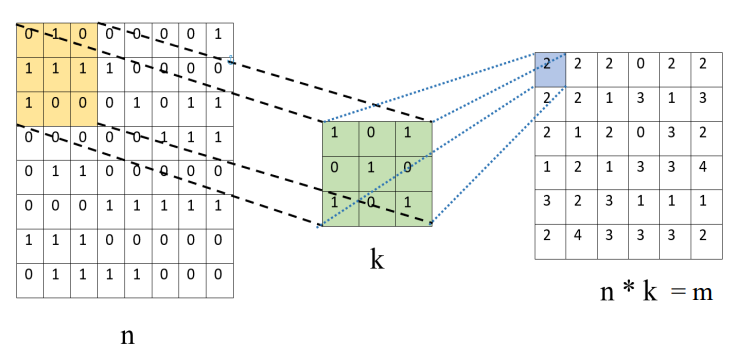

As mentioned earlier feature map extracts information by performing dot product on entire input matrix based on our assigned filter size, in this case filter size is assigned as 3 and finally, forms a new feature map. Convolved feature matrix size is calculated by n-k+1, where n is convolution layer and k is filter. Consider convolved feature matrix as “m” for better understanding. 

At every stage, filter sweeps according to filter size and sums up the entire matrix, resultant number is transferred to convolved feature (m). Consider the above example which is a 3X3 sub matrix of n layer is multiplied by corresponding element in the k (filter) and assigns value in the m. Assume,

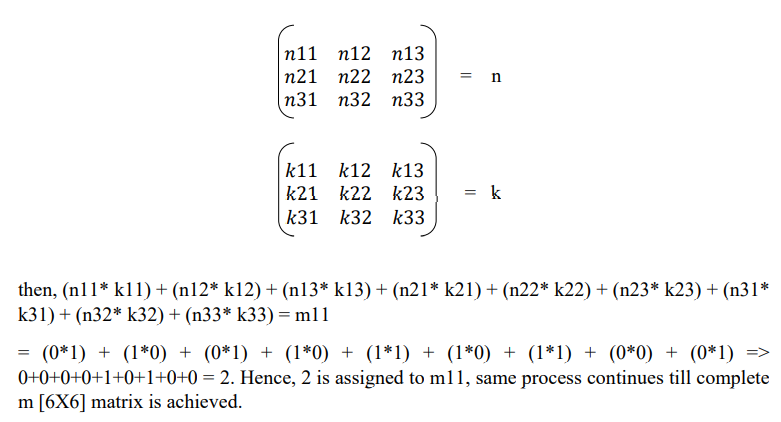

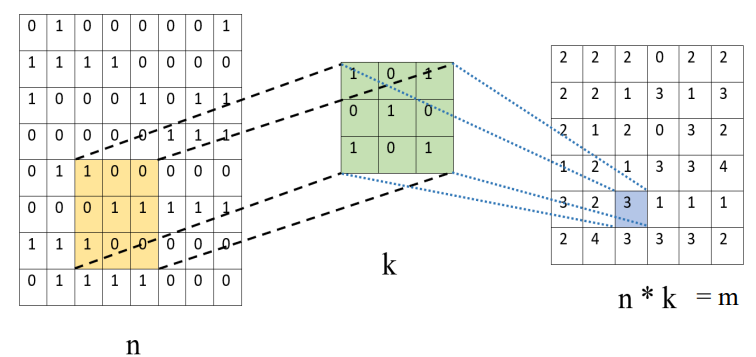

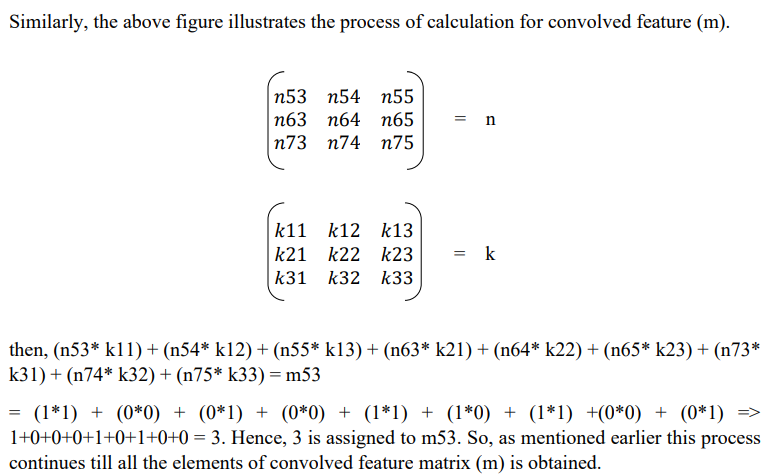

**Max pooling Layer:**

Max pooling layer plays a vital role in down-sampling an image, because it retrains the dimensionality with the maximum value from the submatrix as shown. More specifically, it replaces the sub-matrix group by its maximum number in the feature map. The main reason for doing this is to reduce the processing time and data size.

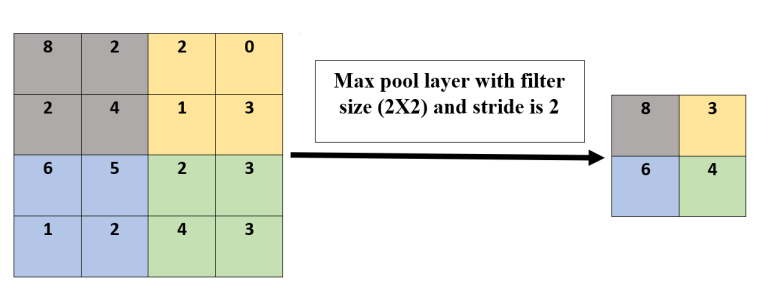

**Activation Functions:** 

Activation layer brings a non-linearity function to the model. Because the input to the activation layer is a real number but with the implementation of activation layer can convert to a non-linearity. There are different types of activation functions but, mainly used functions are: Sigmoid, Tanh, Rectified linear unit (ReLU), and leakyReLU. Activation layer is further divided into two types: 1) saturated layer and 2) non-saturated layer. saturated layer ranges between finite values whereas, non-saturated layer ranges infinite boundary values.
    
**Sigmoid Function:**

It is a saturated activation function since it ranges between [0, 1]. Following formula 
represents Sigmoid function.

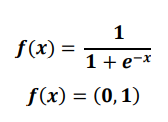

Since, sigmoid function (as our last layer) is used in this project, it can only predict in the range [0, 1] but not 0 or 1. So, it is mandatory to divide the values and categorise as 0 and 1. Where, the values which are between 0.5 and 1 are set to 0 and less than 0.5 are 1. Where 0 is Normal case and 1 is Pneumonia case throughout the project. 

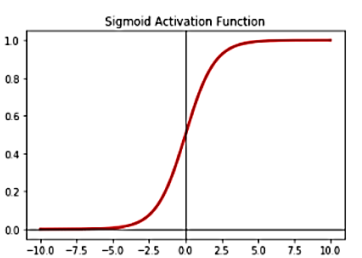


**ReLU Function:**

It is a non-saturated activation layer. ReLU plays a vital role in CNN models due to its flexibility. Because all negative values are mapped to zero all-positive values are considered by the function. Mathematically represented as: 

𝒇(𝒙) = 𝒎𝒂𝒙(𝟎, 𝒙)

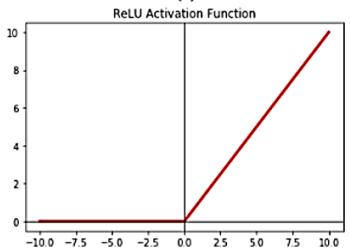




In [6]:
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

CNN_Model=Sequential()

#Image Feature Extraction:(Block: 1 - Block: 3)
#Block-1
CNN_Model.add(layers.Conv2D(16, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
CNN_Model.add(layers.MaxPooling2D(pool_size = (2, 2)))

#Block-2
CNN_Model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
CNN_Model.add(layers.MaxPooling2D(pool_size = (2, 2)))
CNN_Model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
CNN_Model.add(layers.MaxPooling2D(pool_size = (2, 2)))

#Block-3
CNN_Model.add(layers.Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
CNN_Model.add(layers.MaxPooling2D(pool_size = (2, 2)))
CNN_Model.add(layers.Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
CNN_Model.add(layers.MaxPooling2D(pool_size = (2, 2)))

#Final Layer(Classification/prediction)
CNN_Model.add(layers.Flatten())
CNN_Model.add(layers.Dense(activation = 'relu', units = 128))
CNN_Model.add(layers.Dense(activation = 'relu', units = 64))
CNN_Model.add(layers.Dense(activation = 'sigmoid', units = 1))
CNN_Model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

2022-07-26 18:08:53.361332: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-26 18:08:53.487265: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-26 18:08:53.488051: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-26 18:08:53.489209: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

By observing above block, how layers are designed based on different number of layers. The best method is to start always with a lower filter and increase layer wise later. As mentioned earlier section 5.2.1 the kernel/ filter size is [3X3] and activation function used is ReLU. Input shape is the dimensions of an image, which are height and width of the X-ray image and last dimension is colour channel of the image in this project it is “3”. Even the Xray images are of grayscale images, in this project it is assigned as the “3” (colour channel). Because in the Model-1 and Model-2 the network used is ResNet152V2, which has previous trained on the coloured images. One can also choose 1 as colour channel since, X-ray images are of grayscale (Black and White). After every convolution layer a Max pool layer is placed because of the advantages of decreasing the size of the data and processing time as in mentioned earlier section 5.2.2. The size of the pooling layer is [2X2]. The process has been repeated same assuming as 3 blocks.
    
1. Block-1: This block has 1X16 Conv2D layer and one MaxPooling2D layer.
2. Block-2: This block has 2X32 Conv2D layers and two MaxPooling2D layers after each convolution layer.
3. Block-3: This block has 2X64 Conv2D layers and two MaxPooling2D layers after each convolution layer.

Final block is a final layer which are flatten and dense layers, they are meant to classify/ predict a class. Generally, flatten layer receives all pixels of all channels and forms as a 1D vector which does not have any batch size. In this case Sigmoid function is implemented in the last layer since, the problem has binary type of solution (classification), and unit is 1. 
    
To compile the model, basically need three main parameters: 1) Learning rate (optimizer) 2) loss function (loss) 3) Metrics. 
1. Learning rate: Optimizer optimises the loss and aim for Stochastic gradient descent.Mainly used learning rate in this case is “adam” which is an adaptive learning rate method it generates different parameter for each different learning rate. 
2. Loss function: It is assigned as binary_crossentropy because the output is just of binary type either Normal or Pneumonia, and to evaluate loss during training of the model.
3. Metrics: Accuracy, as the name itself defines that this is used to measure and evaluate the training and validation sets loss and accuracy respectively. 


In [7]:
CNN_Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        1

The word Parameters is a count of weights learnt during our training process. Parameters plays a crucial role in the process since, they are the main reason for model’s predictive power by updating layer wise values by performing Back Propagation method. 

These values are changed by optimization technique which is Adam learning method in thiscase. Calculation of parameters in the first model (CNN model from scratch). By observingabove Figure-12, there are three different columns in a table which are: 1) Layer (type) 2) Output Shape 3) Param #, this is nothing but a parameters. So, for each layer, parameters are calculated, and how they really generated. Basically, there is an input layer which is not listed in a table since, it is just an input image shape that had assigned. Hence, there are no learnable parameters in an input layer.
    
1. conv2d (Conv2D): First layer type is Conv2D, and output shape is (None, 222, 222, 16) in this every case “None” is just an extra dimension if batch size may vary. The output of the first layer after convolution operation is [222X222] shape because as mentioned in earlier section 5.2.1. it is calculated as “n-k+1”. So, “(224-3+1) = 222” hence, output shape is [222X222] and fourth dimension is 16 because the defined number of filters are 16. Finally, the output shape is (None, 222, 222, 16). Convolution layer parameters can be determined by a formula (((𝐬𝐡𝐚𝐩𝐞 𝐨𝐟 𝐰𝐢𝐝𝐭𝐡 𝐨𝐟 𝐟𝐢𝐥𝐭𝐞𝐫 (𝐰) ∗𝐬𝐡𝐚𝐩𝐞 𝐨𝐟 𝐡𝐞𝐢𝐠𝐡𝐭 𝐨𝐟 𝐟𝐢𝐥𝐭𝐞𝐫 (𝐡) ∗ 𝐧𝐮𝐦𝐛𝐞𝐫 𝐨𝐟 𝐩𝐫𝐞𝐯𝐢𝐨𝐮𝐬 𝐥𝐚𝐲𝐞𝐫 𝐟𝐢𝐥𝐭𝐞𝐫 (𝐝)) + 𝟏) ∗𝐧𝐮𝐦𝐛𝐞𝐫 𝐨𝐟 𝐜𝐮𝐫𝐫𝐞𝐧𝐭 𝐥𝐚𝐲𝐞𝐫 𝐟𝐢𝐥𝐭𝐞𝐫𝐬 (𝐳)) => (((w * h * d) + 1) * z) => (((3 * 3 *3) + 1) * 16) and (1 is a bias term for each filter) total parameters for first layer is 448.
2. max_pooling2d (MaxPooling2D): Generally Max pool layer does not have any parameters because, it just replaces the sub matrix with a maximum number in it, as discussed in earlier section 5.2.2. The advantage of this layer is to reduce the shape of image by half a number and all the decimals are neglected. Hence, it is given as (None, 224/2, 224/2, number of current layer filters (z)) => (None, 111, 111, 16) with “0” parameters.
3. conv2d_1 (Conv2D): Convolution layer output shape is (None, 109, 109, 32) and parameters are calculated as (((3 * 3 * 16) + 1) * 32) = 4,640 (total parameters). 
4. max_pooling2d_1 (MaxPooling2D): (None, 109/2, 109/2, 32) = (None, 54, 54, 32) and total parameters are 0 as I mentioned above. 
5. conv2d_2 (Conv2D): Convolution layer output shape is (None, 52, 52, 32) and parameters are calculated as (((3 * 3 * 32) + 1) * 32) = 9,248 (total parameters). 
6. max_pooling2d_2 (MaxPooling2D): (None, 52/2, 52/2, 32) = (None, 26, 26, 32) and total parameters are 0. 
7. conv2d_3 (Conv2D): Convolution layer output shape is (None, 24, 24, 64) and parameters are calculated as (((3 * 3 * 32) + 1) * 64) = 18,496 (total parameters). 
8. max_pooling2d_3 (MaxPooling2D): (None, 24/2, 24/2, 64) = (None, 12, 12, 64) and total parameters are 0. 
9. conv2d_4 (Conv2D): Convolution layer output shape is (None, 10, 10, 64) and parameters are calculated as (((3 * 3 * 64) + 1) * 64) = 36,928 (total parameters). 
10. max_pooling2d_3 (MaxPooling2D): (None, 10/2, 10/2, 64) = (None, 5, 5, 64) and total parameters are 0. 
11. flatten (Flatten): Flatten layer collects all the pixels from all the channels and convert as 1D vector. Hence, it does not have any parameters to train. But it has output shape (None, 5 * 5 * 64) = (None, 1,600). 
12. dense (Dense): Dense layer has highest number of parameters when compared with other layers. Since each neuron is connected to every other neuron respectively. The parameters of dense layer are calculated as the product of current and previous layer. Output shape is (None, 128) where, 128 is number of units that had assigned. Formula is represented as “((current layer neurons “c” * previous layer neurons “p”) + 1 * c)” and 1 is a bias term. ((128 * 1600) + 1 * 128) = 204, 928 (total number of parameters).
13. dense_1 (Dense): output shape is (None, 64) and parameters are calculated as ((64 * 128) + 1 * 64) = 8,256.
14. dense_2 (Dense): This is a final layer of sigmoid function, output shape is (None, 1) and parameters are calculated as ((1 * 64) + 1 * 1) = 65 (total parameters).Hence, total parameters are 283,009 (=448 + 4,640 + 9,248 + 18,496 + 36,928 +204,928 + 8,256 + 65), among them all the parameters are trained. Hence, trainable parameters are 283,009. Since all the parameters are trained it has “0” non-trainable parameters. 

##  3.2. Fitting the Model(CNN)

In [8]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [9]:
from sklearn.utils.class_weight import compute_class_weight

weights = compute_class_weight(
                               'balanced', 
                               classes=np.unique(train.classes), 
                               y=train.classes
                               )
cw = dict(zip(np.unique(train.classes), weights))
print(cw)

{0: 1.9371534195933457, 1: 0.6739549839228296}


In [10]:
CNN_Model.fit(train, epochs=50, validation_data=valid, class_weight=cw, callbacks=callbacks_list)

2022-07-26 18:08:58.063591: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-07-26 18:09:00.689394: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


131/131 [==============================] - 113s 805ms/step - loss: 0.4566 - accuracy: 0.7121 - val_loss: 0.2594 - val_accuracy: 0.8933
Epoch 2/50
131/131 [==============================] - 86s 660ms/step - loss: 0.2735 - accuracy: 0.8922 - val_loss: 0.4302 - val_accuracy: 0.8231
Epoch 3/50
131/131 [==============================] - 86s 659ms/step - loss: 0.2192 - accuracy: 0.9141 - val_loss: 0.2457 - val_accuracy: 0.9058
Epoch 4/50
131/131 [==============================] - 86s 658ms/step - loss: 0.1910 - accuracy: 0.9234 - val_loss: 0.1847 - val_accuracy: 0.9442
Epoch 5/50
131/131 [==============================] - 86s 657ms/step - loss: 0.1775 - accuracy: 0.9258 - val_loss: 0.2634 - val_accuracy: 0.8856
Epoch 6/50
131/131 [==============================] - 86s 658ms/step - loss: 0.1697 - accuracy: 0.9356 - val_loss: 0.1775 - val_accuracy: 0.9250
Epoch 7/50
131/131 [==============================] - 87s 665ms/step - loss: 0.1629 - accuracy: 0.9363 - val_loss: 0.1624 - val_accuracy: 0.

## 3.3. Evaluation(CNN)

<AxesSubplot:>

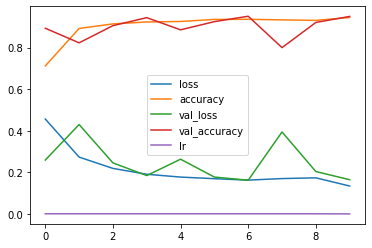

In [11]:
pd.DataFrame(CNN_Model.history.history).plot()

In [12]:
test_accu_CNN = CNN_Model.evaluate(test)
print('The testing accuracy is :',test_accu_CNN[1]*100, '%')

20/20 [==============================] - 8s 361ms/step - loss: 0.3265 - accuracy: 0.9054
The testing accuracy is : 90.54487347602844 %


In [13]:
preds = CNN_Model.predict(test,verbose=1)

20/20 [==============================] - 6s 263ms/step


In [14]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

<AxesSubplot:>

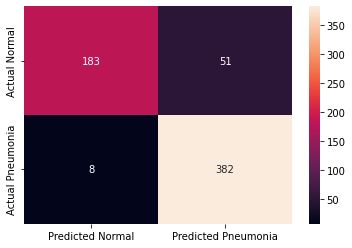

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

cm = pd.DataFrame(data=confusion_matrix(test.classes, predictions, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
sns.heatmap(cm,annot=True,fmt="d")

In [16]:
print(classification_report(y_true=test.classes,y_pred=predictions,target_names =['NORMAL','PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.96      0.78      0.86       234
   PNEUMONIA       0.88      0.98      0.93       390

    accuracy                           0.91       624
   macro avg       0.92      0.88      0.89       624
weighted avg       0.91      0.91      0.90       624



(624, 224, 224, 3)
(624,)


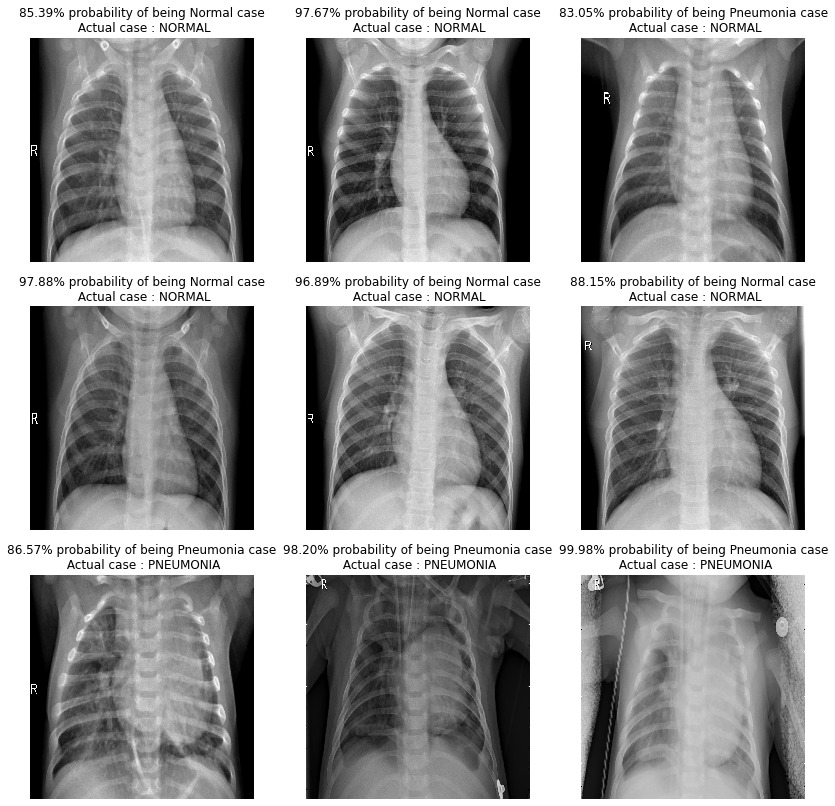

In [17]:
test.reset()
x=np.concatenate([test.next()[0] for i in range(test.__len__())])
y=np.concatenate([test.next()[1] for i in range(test.__len__())])
print(x.shape)
print(y.shape)

dic = {0:'NORMAL', 1:'PNEUMONIA'}
plt.figure(figsize=(14, 14))
for i in range(0+228, 9+228):
  plt.subplot(3, 3, (i-228)+1)
  if preds[i, 0] >= 0.5: 
      out = ('{:.2%} probability of being Pneumonia case'.format(preds[i][0]))
      
      
  else: 
      out = ('{:.2%} probability of being Normal case'.format(1-preds[i][0]))
  plt.title(out+"\n Actual case : "+ dic.get(y[i]))    
  plt.imshow(np.squeeze(x[i]))
  plt.axis('off')
plt.show()

#  4. Model-2: Transfer Learning (TL_Model)


This technique is the second type of approach to the scenario by performing TLtechnique. In this case it has been used a pretrained model for extraction of features, model that had used in this approach is ResNet152V2. This model is pretrained on ImageNet dataset.As it can clearly observe from the below Figure-19, freeze the feature layers and retrain the classification part. 
    
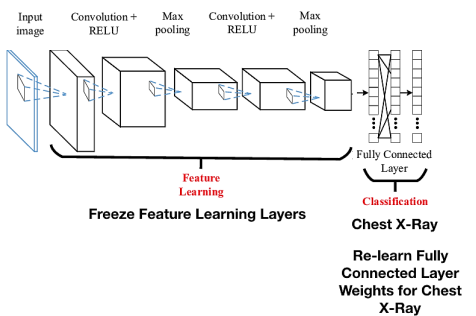

Residual Networks (ResNet) networks are also a deep network, but it does not have any vanish gradient in their process. This is mainly because of the concept called “Skip Connection”. There are different types of models in ResNet based on different number of layers like: ResNet50, ResNet50V2, ResNet101, ResNet101V2, ResNet152, and ResNet152V2 functions.

This network also has convolution layers as other methods but here the special case is that by addingour original input to the output of Convolution block so, this type of connection is named as “Skip connection”. This is the major step to vanishing gradient because, by this process few layers are skipped, so it does not reach to small values which result in diminishing of vanishing gradient. Below Figure is a general model architecture of ResNet.
    
 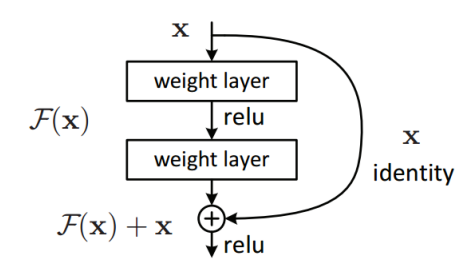
 
 

In [18]:
base_model = tf.keras.applications.ResNet152V2(
    weights='imagenet',
    input_shape=(img_height, img_width, 3),
    include_top=False)
base_model.trainable = False

def get_pretrained():
    inputs = layers.Input(shape=(img_height, img_width, 3))
    x = base_model(inputs)
    
    # Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
   
    
    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model                                        

234561536/234545216 [==============================] - 1s 0us/step


In [19]:
keras.backend.clear_session()

TL_Model = get_pretrained()
TL_Model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

TL_Model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet152v2 (Functional)     (None, 7, 7, 2048)        58331648  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 58,602,241
Trainable params: 270,593
Non-trainable params: 58,331,648
___________________________________________

**Calculation of parameters for TL Technique:**

As the featured learning layers are frozen the parameters of this layers are also predetermined. Final, classified layers parameters are obtained by the retrained layer. All the parameter rules and formulas are similar as mentioned in Model-1
    
* ResNet512V2 parameters are 58331648
* dense (Dense): Formula is represented as “((c * p) + 1 * c) and 1 is a bias term”. ((128 * 2048) + 1 * 128) = 262,272.
* dense_1 (Dense): output shape is (None, 64) and parameters are calculated as ((64 * 128) + 1 * 64) = 8,256.
* dense_2 (Dense): This is a final layer of sigmoid function, output shape is (None, 1) and parameters are calculated as ((1 * 64) + 1 * 1) = 65 (total parameters).The total parameters performed in this model are 58,602,241, Trainable Parameters are 270,593 and Non-trainable Parameters are 58,331,648. It can clearly observable that the trained parameters are 270,593 because of the retrained layers and non-trained layers of 58,331,648parameters are frozen. 

##  4.1. Fitting the Model(TL)

In [20]:
TL_Model.fit(train,epochs=50, validation_data=valid, class_weight=cw, callbacks=callbacks_list)

Epoch 1/50
131/131 [==============================] - 104s 732ms/step - loss: 0.2317 - accuracy: 0.9039 - val_loss: 0.1881 - val_accuracy: 0.9298
Epoch 2/50
131/131 [==============================] - 94s 715ms/step - loss: 0.1527 - accuracy: 0.9399 - val_loss: 0.2611 - val_accuracy: 0.8981
Epoch 3/50
131/131 [==============================] - 95s 722ms/step - loss: 0.1300 - accuracy: 0.9468 - val_loss: 0.1507 - val_accuracy: 0.9481
Epoch 4/50
131/131 [==============================] - 94s 714ms/step - loss: 0.1306 - accuracy: 0.9470 - val_loss: 0.3039 - val_accuracy: 0.8933
Epoch 5/50
131/131 [==============================] - 95s 720ms/step - loss: 0.1124 - accuracy: 0.9554 - val_loss: 0.1194 - val_accuracy: 0.9615
Epoch 6/50
131/131 [==============================] - 94s 718ms/step - loss: 0.1019 - accuracy: 0.9621 - val_loss: 0.1541 - val_accuracy: 0.9481
Epoch 7/50
131/131 [==============================] - 95s 725ms/step - loss: 0.1194 - accuracy: 0.9504 - val_loss: 0.2443 - val_a

## 4.2. Evaluation(TL)

<AxesSubplot:>

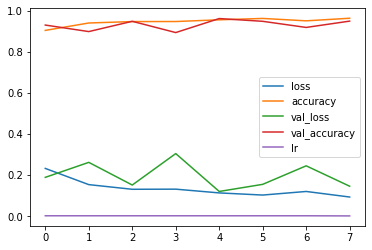

In [21]:
pd.DataFrame(TL_Model.history.history).plot()

In [22]:
test_accu_TL = TL_Model.evaluate(test)
print('The testing accuracy is :',test_accu_TL[1]*100, '%')

20/20 [==============================] - 6s 283ms/step - loss: 0.2624 - accuracy: 0.9151
The testing accuracy is : 91.50640964508057 %


In [23]:
preds = TL_Model.predict(test,verbose=1)

20/20 [==============================] - 8s 265ms/step


<AxesSubplot:>

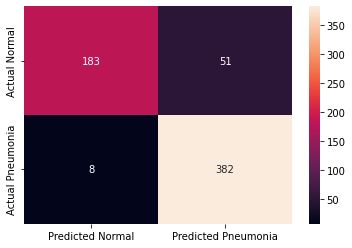

In [24]:
cm = pd.DataFrame(data=confusion_matrix(test.classes, predictions, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
sns.heatmap(cm,annot=True,fmt="d")

In [25]:
print(classification_report(y_true=test.classes,y_pred=predictions,target_names =['NORMAL','PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.96      0.78      0.86       234
   PNEUMONIA       0.88      0.98      0.93       390

    accuracy                           0.91       624
   macro avg       0.92      0.88      0.89       624
weighted avg       0.91      0.91      0.90       624



(624, 224, 224, 3)
(624,)


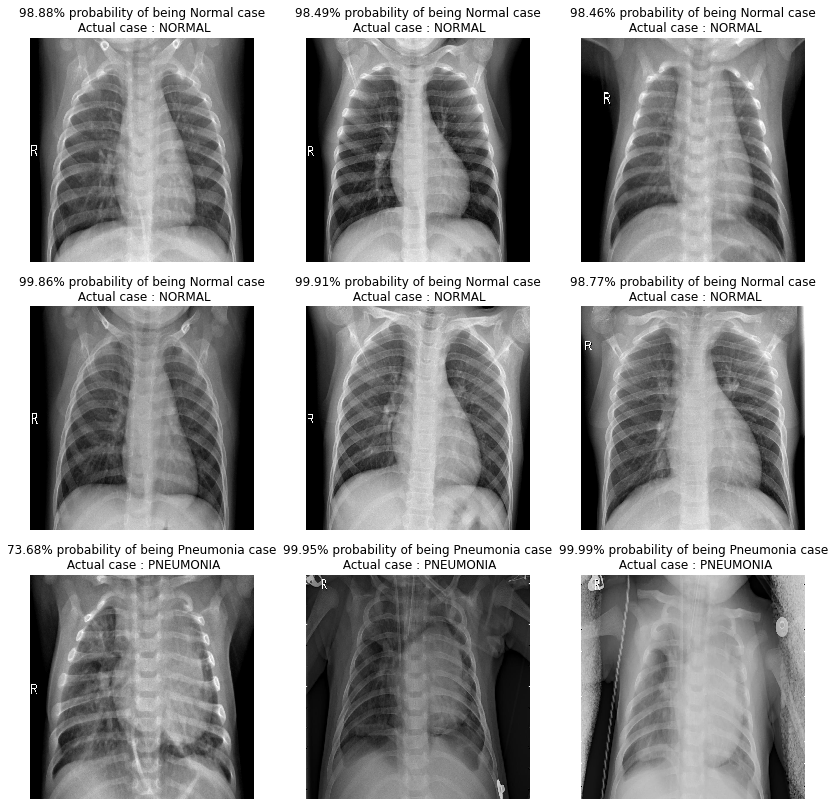

In [26]:
test.reset()
x=np.concatenate([test.next()[0] for i in range(test.__len__())])
y=np.concatenate([test.next()[1] for i in range(test.__len__())])
print(x.shape)
print(y.shape)

dic = {0:'NORMAL', 1:'PNEUMONIA'}
plt.figure(figsize=(14, 14))
for i in range(0+228, 9+228):
  plt.subplot(3, 3, (i-228)+1)
  if preds[i, 0] >= 0.5: 
      out = ('{:.2%} probability of being Pneumonia case'.format(preds[i][0]))    
  else: 
      out = ('{:.2%} probability of being Normal case'.format(1-preds[i][0]))
  plt.title(out+"\n Actual case : "+ dic.get(y[i]))    
  plt.imshow(np.squeeze(x[i]))
  plt.axis('off')
plt.show()

#  5. Model-3: Fine Tuning (FT)

Fine Tuning Technique is the third type of approach in this project. FT is the most efficient and accurate technique because of its flexibility as mentioned in above section 3.4. In this model every aspect is similar to the TL model (Model-2), only change is that by unfreezinglast few layers of feature extraction part rest everything is similar. This small change will bring a great result in the model prediction because, of retraining the last few layers of feature learning layers as shown in Figure-28. The Pretrained model is also same as performed in the Model-2 which is Resnet152V2.

In [27]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-15]:
    layer.trainable = False

In [28]:
TL_Model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

TL_Model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet152v2 (Functional)     (None, 7, 7, 2048)        58331648  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 58,602,241
Trainable params: 5,789,953
Non-trainable params: 52,812,288
_________________________________________

**Calculation of parameters for FT Technique:**

The Model-3 summary of layers will be same as the Model-2 because it is the same layers that are using now but, in this technique, the last 15 layers are Unfreeze. By this changethe number of trainable and non-trainable parameters in this model will change. All the parameters of Dense layers also do not change as clearly seen in the Figure-29. Total trainable parameters in this technique are 5,789,953 whereas in the Model-2 are 270,593. Analyse in depth:

* Trainable parameters = (Dense layer’s parameters) + (retrained parameters from pretrained model)
  = 270,593 + 5,519,360
  = 5,789,953
* Non-Trainable parameters = (ResNet152V2 parameters) - (retrained parameters from pretrained model) 
  = 58,331,648 - 5,519,360
  = 52,812,288
* Total parameters = (Trainable parameters) + (Non-Trainable Parameters) 
  = 5,789,953 + 52,812,288
  = 58,602,241


## 5.1. Fitting the Model(FT)

In [29]:
TL_Model.fit(train,epochs=50, validation_data=valid, class_weight=cw, callbacks=callbacks_list)

Epoch 1/50
131/131 [==============================] - 105s 741ms/step - loss: 0.1938 - accuracy: 0.9256 - val_loss: 0.4124 - val_accuracy: 0.9471
Epoch 2/50
131/131 [==============================] - 95s 725ms/step - loss: 0.1265 - accuracy: 0.9487 - val_loss: 0.2651 - val_accuracy: 0.9481
Epoch 3/50
131/131 [==============================] - 95s 723ms/step - loss: 0.1246 - accuracy: 0.9463 - val_loss: 0.6426 - val_accuracy: 0.7962
Epoch 4/50
131/131 [==============================] - 95s 723ms/step - loss: 0.1050 - accuracy: 0.9561 - val_loss: 0.2286 - val_accuracy: 0.9433
Epoch 5/50
131/131 [==============================] - 96s 735ms/step - loss: 0.0974 - accuracy: 0.9635 - val_loss: 0.1736 - val_accuracy: 0.9529
Epoch 6/50
131/131 [==============================] - 96s 734ms/step - loss: 0.0868 - accuracy: 0.9661 - val_loss: 0.1134 - val_accuracy: 0.9654
Epoch 7/50
131/131 [==============================] - 96s 732ms/step - loss: 0.0880 - accuracy: 0.9666 - val_loss: 0.2156 - val_a

## 5.2. Evaluation(FT)

<AxesSubplot:>

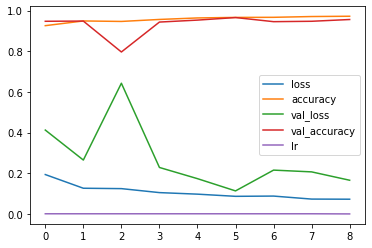

In [30]:
pd.DataFrame(TL_Model.history.history).plot()

In [31]:
test_accu_FT = TL_Model.evaluate(test)
print('The testing accuracy is :',test_accu_FT[1]*100, '%')

20/20 [==============================] - 6s 272ms/step - loss: 0.2942 - accuracy: 0.9087
The testing accuracy is : 90.86538553237915 %


In [32]:
preds = TL_Model.predict(test,verbose=1)

20/20 [==============================] - 8s 276ms/step


<AxesSubplot:>

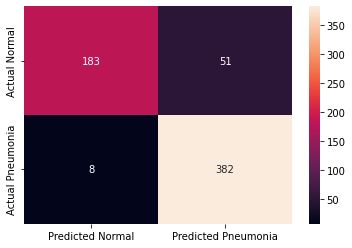

In [33]:
cm = pd.DataFrame(data=confusion_matrix(test.classes, predictions, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
sns.heatmap(cm,annot=True,fmt="d")

In [34]:
print(classification_report(y_true=test.classes,y_pred=predictions,target_names =['NORMAL','PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.96      0.78      0.86       234
   PNEUMONIA       0.88      0.98      0.93       390

    accuracy                           0.91       624
   macro avg       0.92      0.88      0.89       624
weighted avg       0.91      0.91      0.90       624



(624, 224, 224, 3)
(624,)


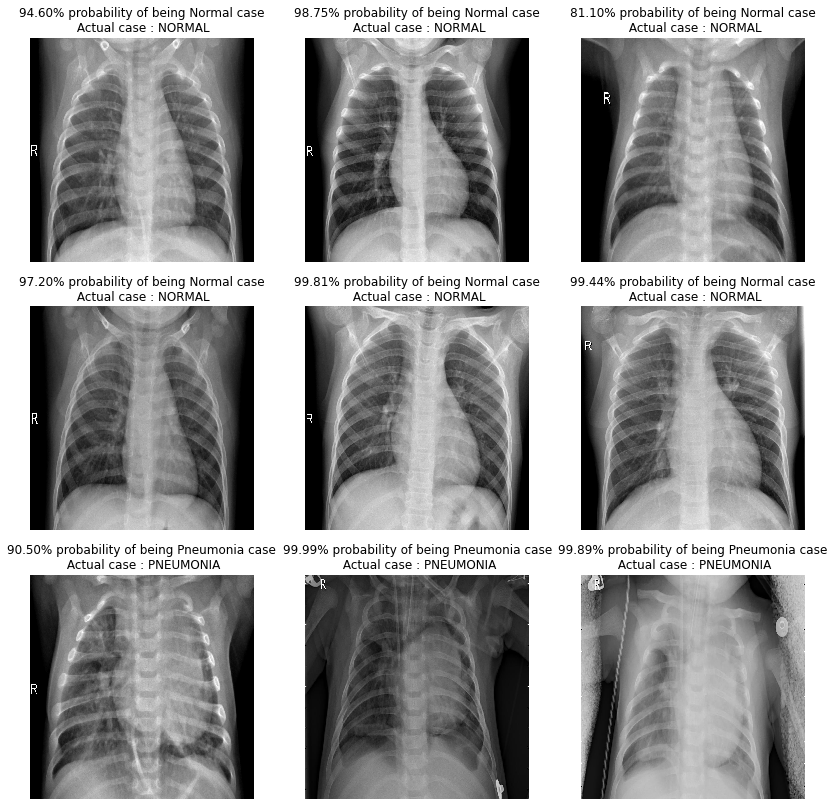

In [35]:
test.reset()
x=np.concatenate([test.next()[0] for i in range(test.__len__())])
y=np.concatenate([test.next()[1] for i in range(test.__len__())])
print(x.shape)
print(y.shape)

dic = {0:'NORMAL', 1:'PNEUMONIA'}
plt.figure(figsize=(14, 14))
for i in range(0+228, 9+228):
  plt.subplot(3, 3, (i-228)+1)
  if preds[i, 0] >= 0.5: 
      out = ('{:.2%} probability of being Pneumonia case'.format(preds[i][0]))    
  else: 
      out = ('{:.2%} probability of being Normal case'.format(1-preds[i][0]))
  plt.title(out+"\n Actual case : "+ dic.get(y[i]))    
  plt.imshow(np.squeeze(x[i]))
  plt.axis('off')
plt.show()

#  6. Final Accuracy of Model-1 (CNN model from Scratch), Model-2 (TF) and Model-3 (FT)

In [36]:
print('1. The testing accuracy of Model-1 (CNN model from Scratch) is :',test_accu_CNN[1]*100, '%')
print('2. The testing accuracy of Model-2 (Transfer Learning) is :',test_accu_TL[1]*100, '%')
print('3. The testing accuracy of Model-3 (Fine Tuning) is :',test_accu_FT[1]*100, '%')

1. The testing accuracy of Model-1 (CNN model from Scratch) is : 90.54487347602844 %
2. The testing accuracy of Model-2 (Transfer Learning) is : 91.50640964508057 %
3. The testing accuracy of Model-3 (Fine Tuning) is : 90.86538553237915 %


> **Please Upvote my page and encourage **

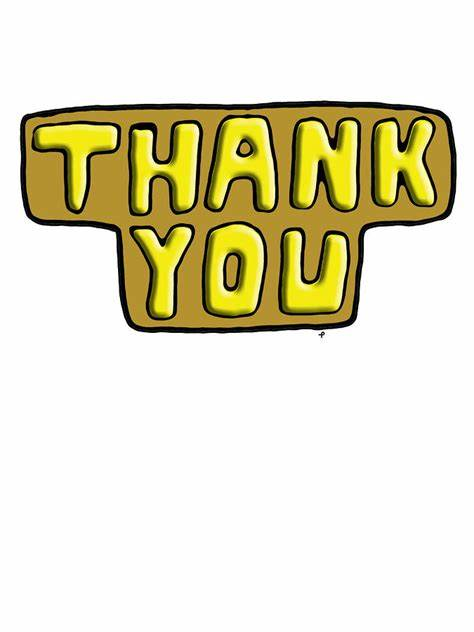